In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../Data'
classes = os.listdir(path)
classes

['Cat', 'Dog']

#### 1. Data Visualization

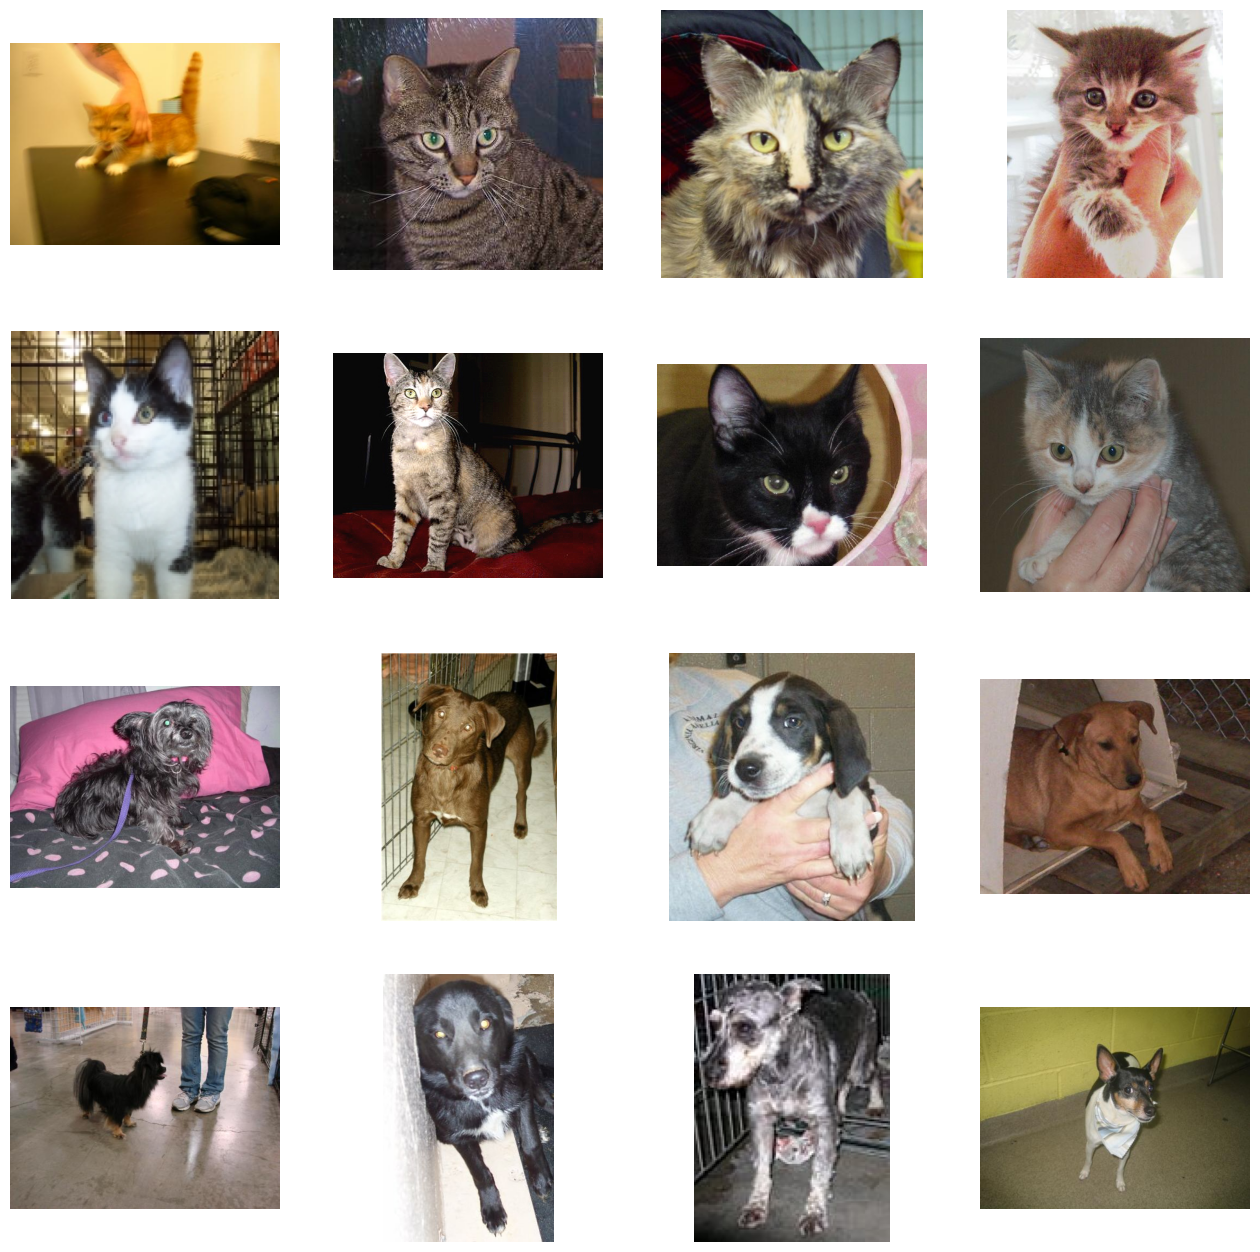

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cat_dir = os.path.join(path, 'Cat')
dog_dir = os.path.join(path, 'Dog')

cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

cat_images = [os.path.join(cat_dir, fname) for fname in cat_names[:8]]
dog_images = [os.path.join(dog_dir, fname) for fname in dog_names[:8]]

# Displaying sample images
fig = plt.gcf()
fig.set_size_inches(16, 16)

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')
	img = mpimg.imread(img_path)
	plt.imshow(img)
plt.show()

#### 2. Data Preperation for Training

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

base_dir = '../Data'

# Creating train data
train_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(200, 200),
    seed=1,
    subset='training',
    validation_split=0.1,
    batch_size=32
)

# Creating test data
test_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(200, 200),
    seed=1,
    subset='validation',
    validation_split=0.1,
    batch_size=32
)

Found 24959 files belonging to 2 classes.
Using 22464 files for training.
Found 24959 files belonging to 2 classes.
Using 2495 files for validation.


#### 3. Building the Model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import layers

model = Sequential([
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
	layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
	layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
	layers.Flatten(),
    
	layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760,641 (33.42 MB)

 Trainable params: 8,760,641 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
  5/702 ━━━━━━━━━━━━━━━━━━━━ 5:32 476ms/step - accuracy: 0.4752 - loss: 30316.0664

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_2112]